# Sentiment Analysis Toward US Airlines

#### Team Members:
1) Tan Fei Zhi (MCS221016)<br>
2) Mohd Fikri bin Mohd Hanim (MCS211043)<br>
3) Mohamad Nor Azni bin Zainal Abidin (MCS211050)<br>
4) Teh Hung Wei (MCS212011) <br>


#### Dataset: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

**Problem Background**<br>
The US Department of Transportation revealed that Frontier Airlines was one of six carriers - and the only US-based one - that will have to reimburse customers over $600 million for flights that were delayed or canceled since March 2020.<br>
Receiving many negative feedback from passengers on twitters.  Customer satisfaction is a crucial factor in a company's success. Analyzing customer sentiment from written feedback can be time-consuming and labor-intensive for airlines. 

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Read dataset

In [2]:
url = 'https://raw.githubusercontent.com/feizhi98/dataset/main/Tweets.csv'
df = pd.read_csv(url)

#### Print first 5 rows of data 

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### Print dimension of df

In [4]:
df.shape

(14640, 15)

This dataset consists of 15 attributes (columns) and 14640 rows of data.

#### Print information of the data (eg: indexes , non-null values)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Based on the datatypes above, the tweet_created indicates the time that passengers created the post on Twitter. Hence, it should be in datetime format.

#### Print data types of each columns

In [6]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

#### Check the null values of the dataset

In [7]:
df.isnull().sum() 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

To get a better idea on the null values in order decide whether need to drop the columns or not, the percentage of nulls values is calculated. 

#### Print percentage of null values

In [8]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

# Part 1: Data Pre-processing

#### Change type of tweet_created

Change tweet_created from object to datetime

In [9]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

#### Print the data info

Print data info again to check the data type of tweet_created

In [10]:
df.dtypes

tweet_id                                                         int64
airline_sentiment                                               object
airline_sentiment_confidence                                   float64
negativereason                                                  object
negativereason_confidence                                      float64
airline                                                         object
airline_sentiment_gold                                          object
name                                                            object
negativereason_gold                                             object
retweet_count                                                    int64
text                                                            object
tweet_coord                                                     object
tweet_created                   datetime64[ns, pytz.FixedOffset(-480)]
tweet_location                                                  object
user_t

Now the tweet_created is in datetime format.

#### Drop columns with 90% null values

There are three columns that having more than 90% null values, drop the columns.

In [11]:
df.drop('airline_sentiment_gold', inplace=True, axis=1)
df.drop('negativereason_gold', inplace=True, axis=1)
df.drop('tweet_coord', inplace=True, axis=1)

#### Print data shape 

In [12]:
df.shape

(14640, 12)

The df consists only 12 columns now.

#### Fill null values with NaN

In [13]:
df=df.mask(df == '')

#### Print first 5 rows

In [14]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada)


# Part 2: Exploratory Data Analysis (EDA) 

#### Check the airlines in dataset

In [15]:
df.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

#### Calculate the tweet times for each airline companies

In [16]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American']

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


### Data Visualization 

#### Import libraries for graph plotting

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Bar graph of the number of tweets

Text(0, 0.5, 'No.of Tweets')

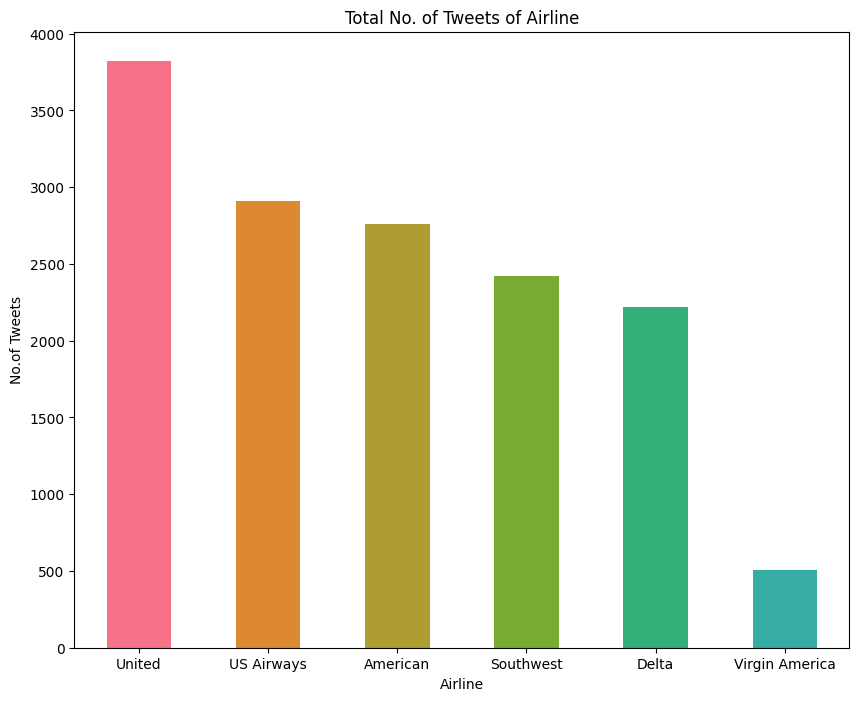

In [18]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

United has the most number of tweets while Virgin America has the least number of tweets.

#### Counts for types of sentiment

In [19]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

#### Bar chart on counts for types of sentiment

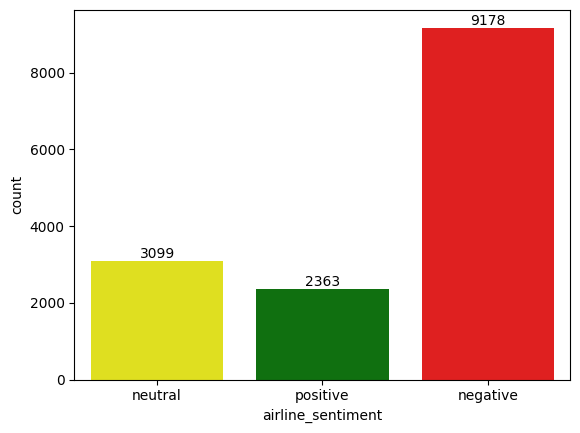

In [20]:
ax = sns.countplot(data =df, x = "airline_sentiment", palette=["yellow","green", "red"])
ax.bar_label(ax.containers[0]);

#### Pie chart of counts for types of sentiment

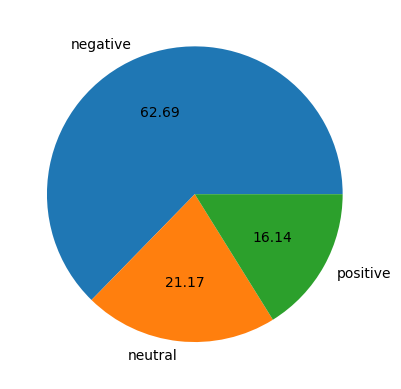

In [21]:
plt.pie(df['airline_sentiment'].value_counts(),labels=['negative','neutral','positive'],autopct='%0.2f')
plt.show()

Based on the pie chart above, the negative reactions tweets recorded the most highest with (62.69%). The neutral reactions recorded (21.17%) while the positive reactions toward airline companies recorded the least with (16.14%.)

#### Counts of sentiments for each airline

In [22]:
for i in airlines:
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    print('Count of Moods of '+i)
    print(count)
    print(' ')

Count of Moods of Virgin America
negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64
 
Count of Moods of United
negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
 
Count of Moods of Southwest
negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
 
Count of Moods of Delta
negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
 
Count of Moods of US Airways
negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
 
Count of Moods of American
negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
 


**United, Southwest, US Airways** companies received the most **negative** reactions.<br>
**Southwest and Delta** companies received the most **positive** reactions.<br>
**The tweets of Virgin America** received the most **balanced reactions** from the passengers.


#### Bar graph on the counts of sentiments for each airlines

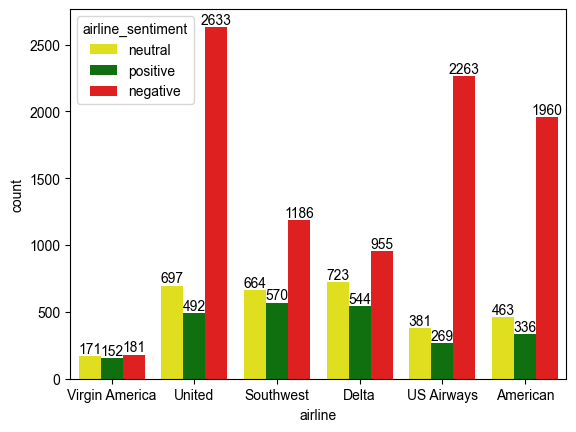

In [23]:
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment", palette=["yellow","green", "red"])
for p in ax.containers:
    ax.bar_label(p)
    
sns.set(rc={'figure.figsize':(15,10)})    

#### Bar graph on percentage of negative reactions of each airlines companies

            Percent Negative
American            0.710402
Delta               0.429793
Southwest           0.490083
US Airways          0.776862
United              0.688906
Virgin              0.359127


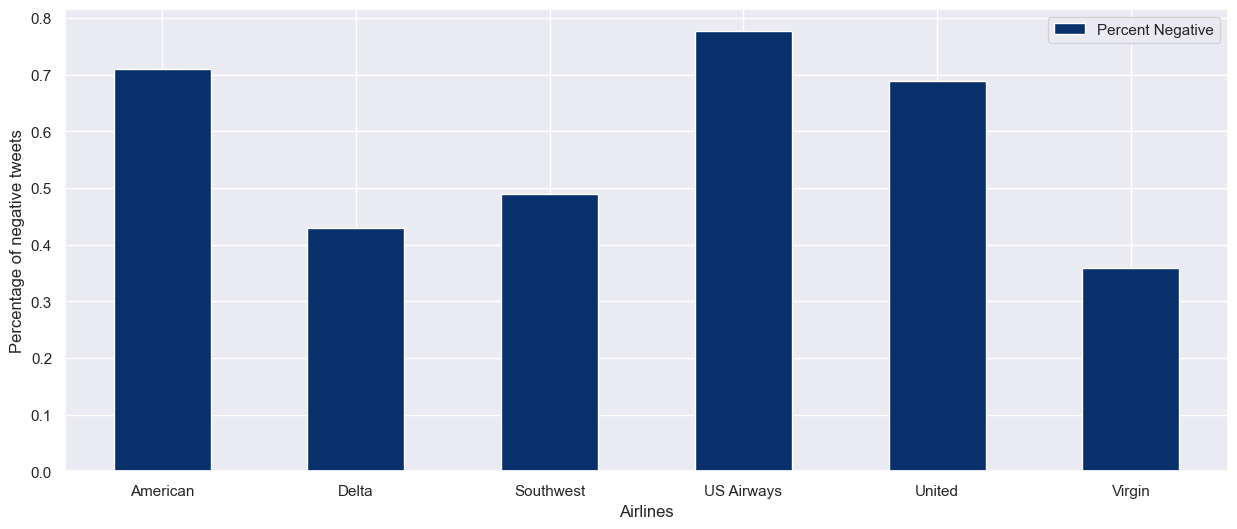

In [24]:
neg_tweets = df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = df.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'Blues_r', figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

The top 3 airlines that have the negative reactions are US Airways, American and United.

#### Bar graph to plot overall negative reason and for each airlines

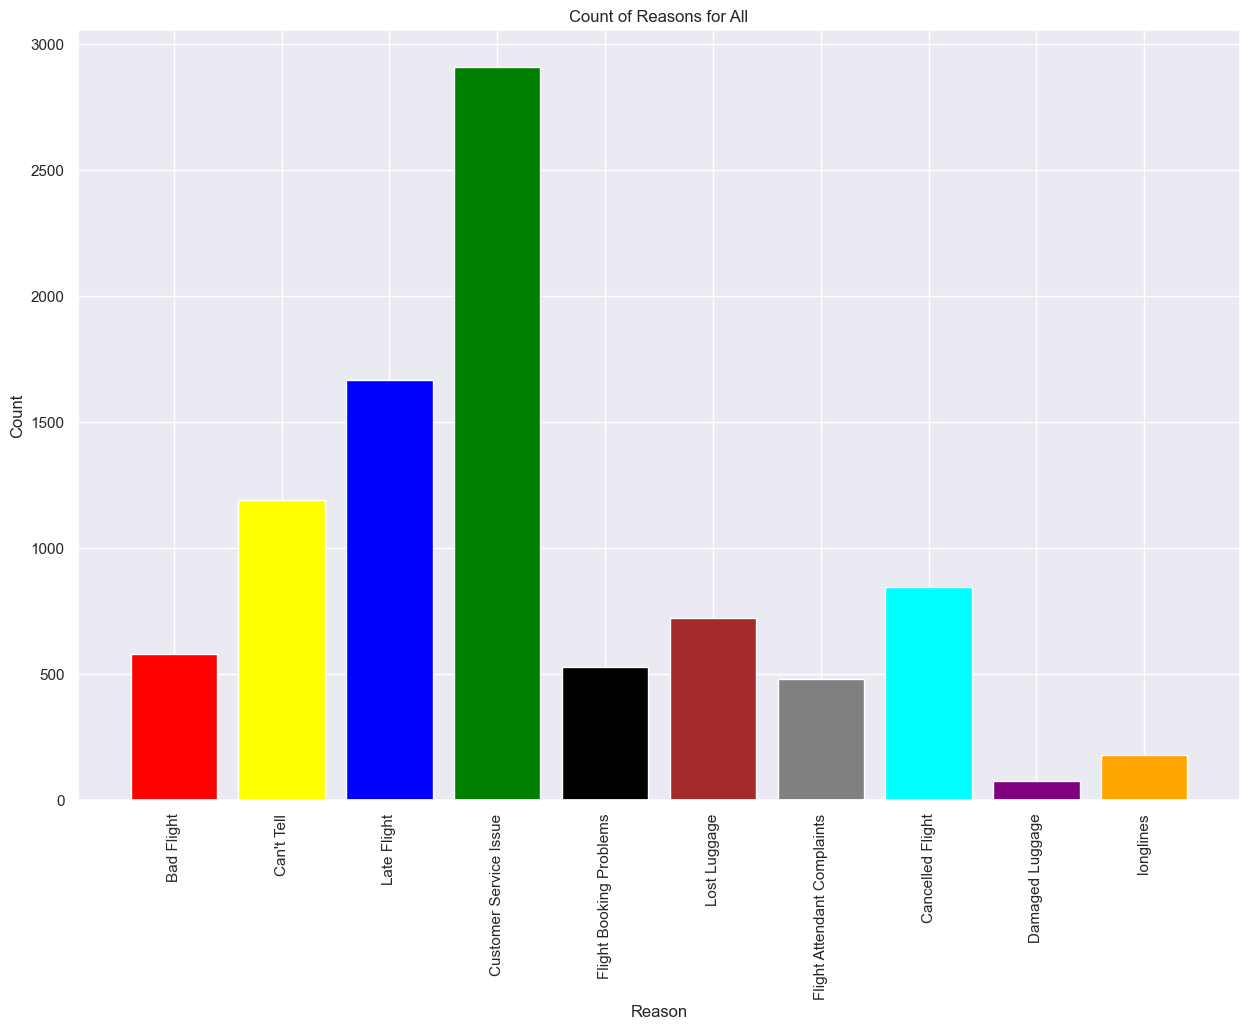

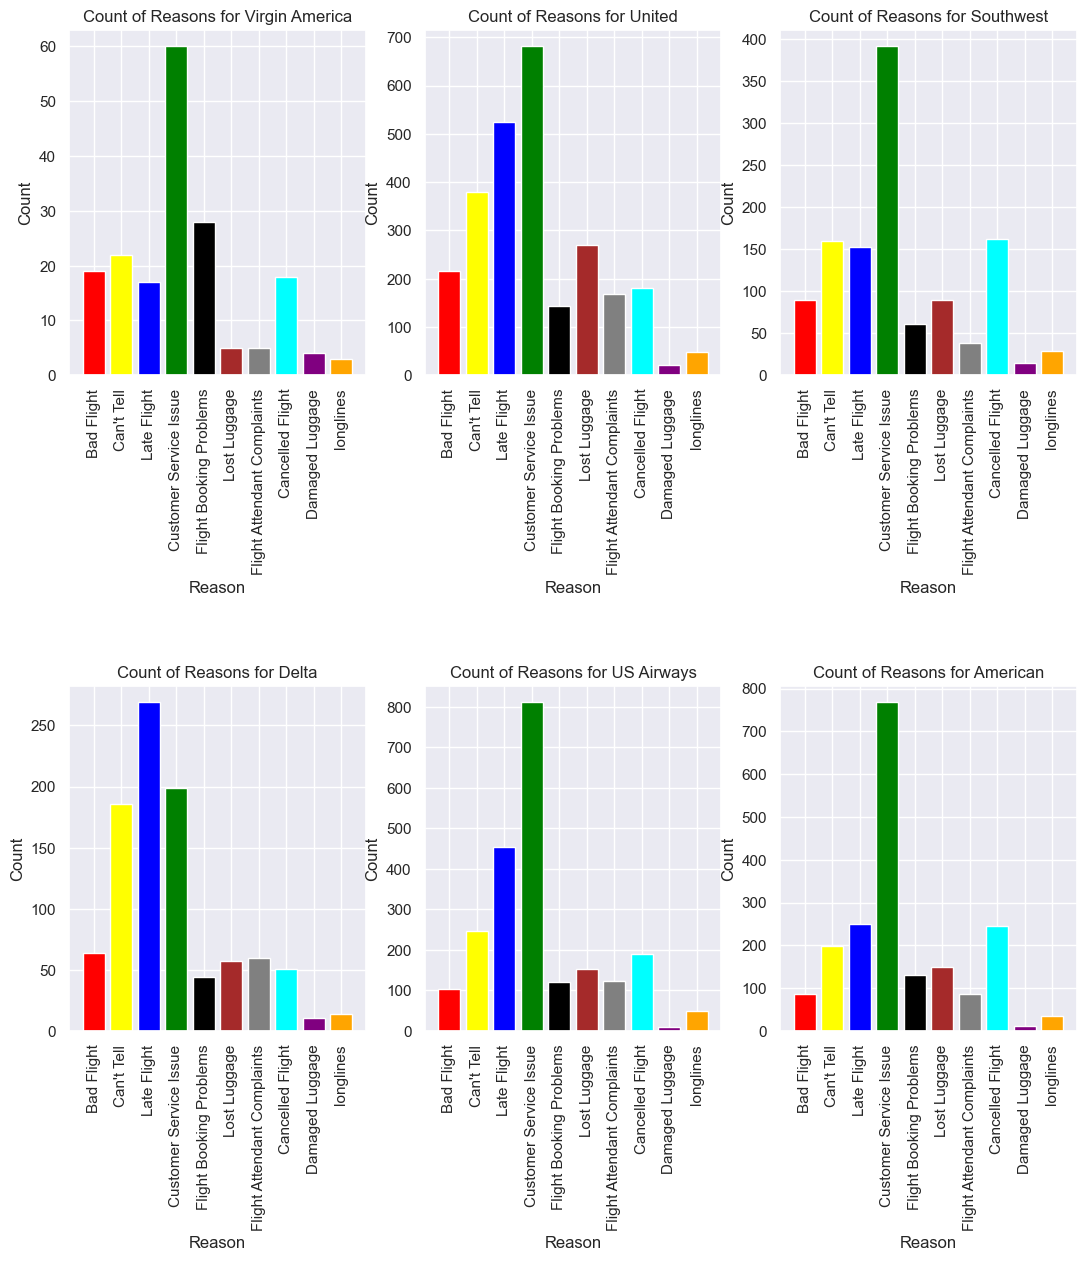

In [25]:
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index, count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

-Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America<br>
-Late Flight is the main negative reason for Delta<br>
-Virgin America has the least count of negative reasons<br>
-Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons

#### Overview on reasons of negative reactions on airlines

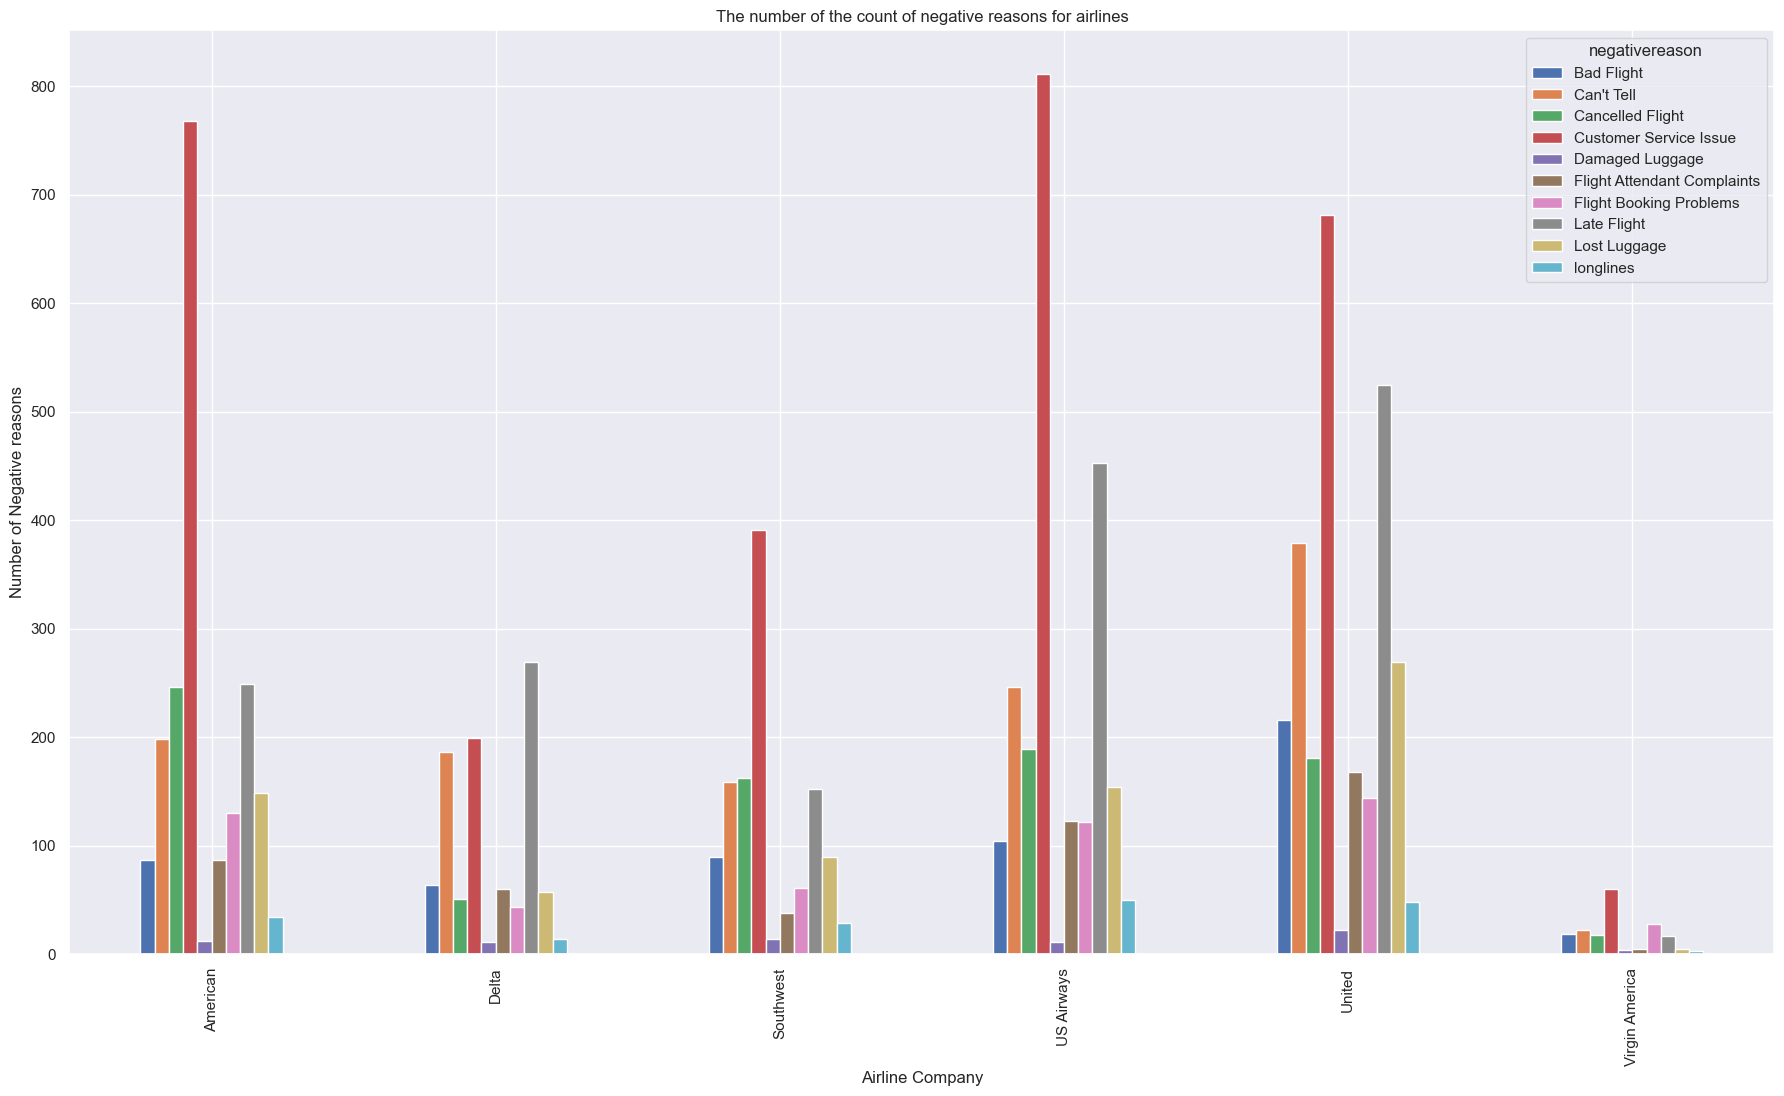

In [26]:
negative_reasons = df.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

Based on the bar graph above, the most highest reason is customer service issue.

#### Know the relationship of between Date and Negative Sentiments

In [27]:
date = df.reset_index()

date.tweet_created = pd.to_datetime(date.tweet_created)

#Convert date with no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()


day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

#### Plot graph of negative reactions based on the date

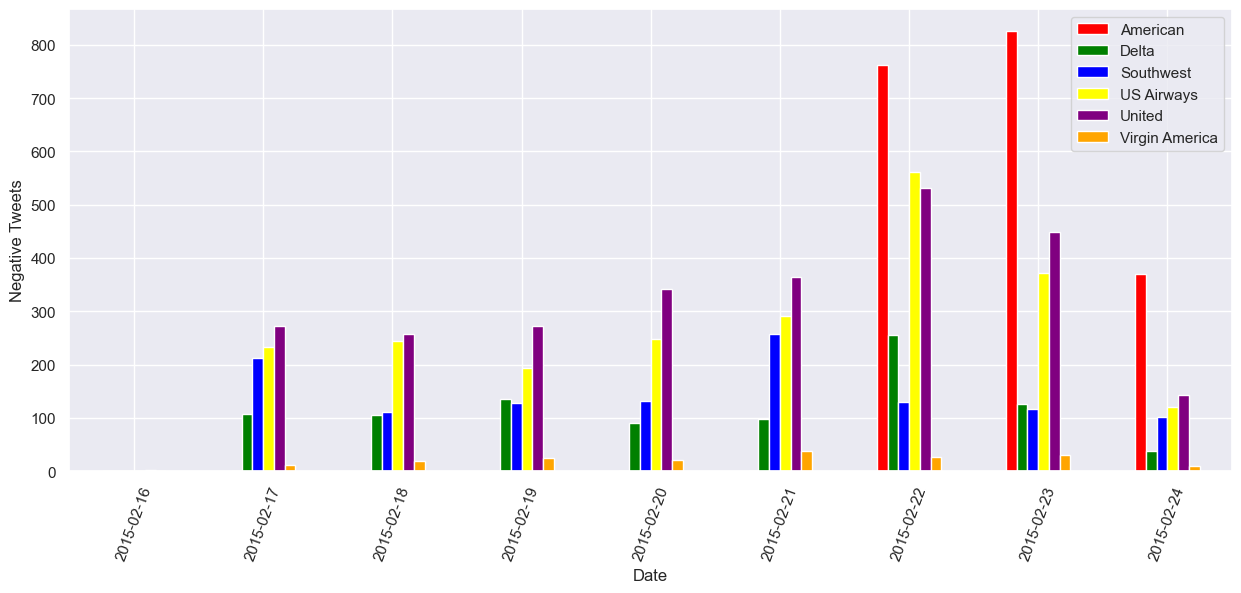

In [28]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

Based on the graph above, the negative reactions toward airline recorded the most highest in 23 Feb 2015. This result indicates that some issues might happen on that day. 

To summarize, the graph shows a strong relationship between date and negative tweets. If any airlines issue happens on the day, the more negative tweets.

### Find the most used words in positive and negative tweets using wordclouds

**Wordcloud** is a visual representation of the most frequently used words in a text. The bigger the word displayed, the most frequent the word appears in tweet. 

#### Install wordcloud package

In [29]:
!pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import wordcloud libraries

In [30]:
from wordcloud import WordCloud,STOPWORDS

#### Find the negative sentiments word

To find the most negative word appear in the tweets, it was shown in red color to represent negative.

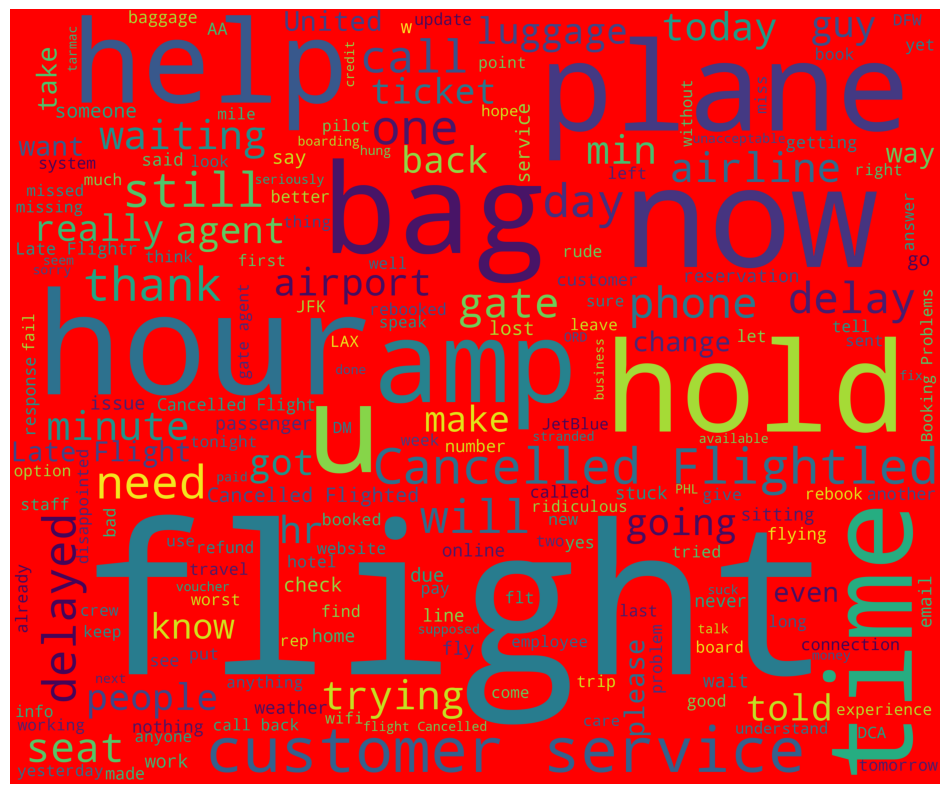

In [31]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='red',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Find the neutral sentiments word

To find the most neutral word appear in the tweets, it was shown in black color to represent neutral.

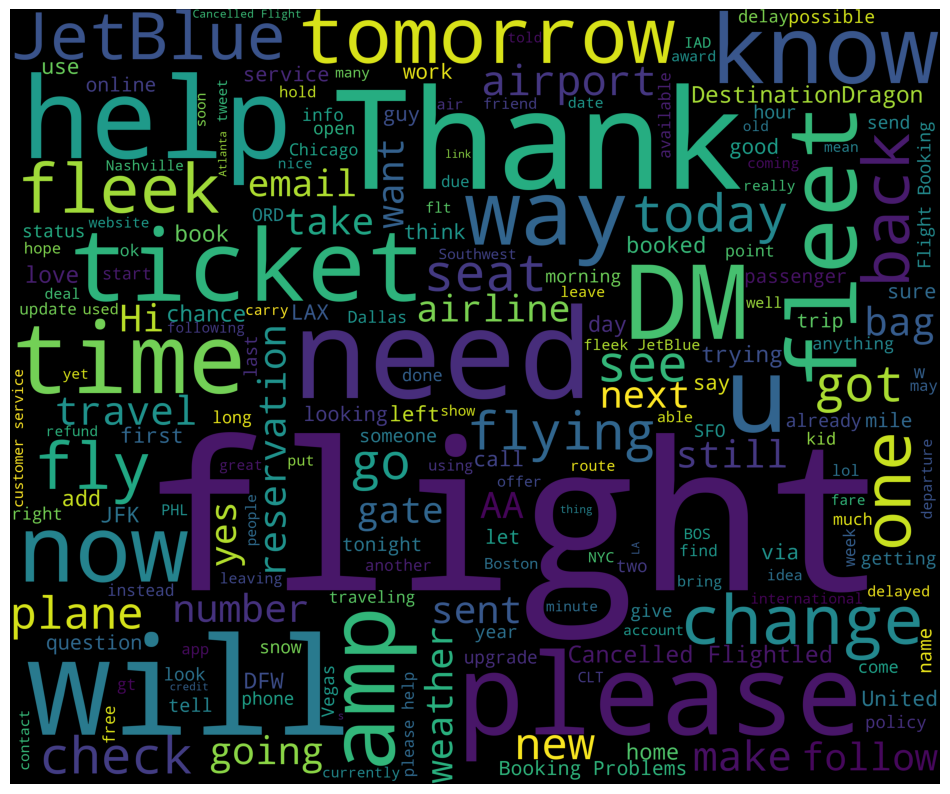

In [32]:
new_df=df[df['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Find the positive sentiments word

To find the most positive word appear in the tweets, it was shown in green color to represent positive.

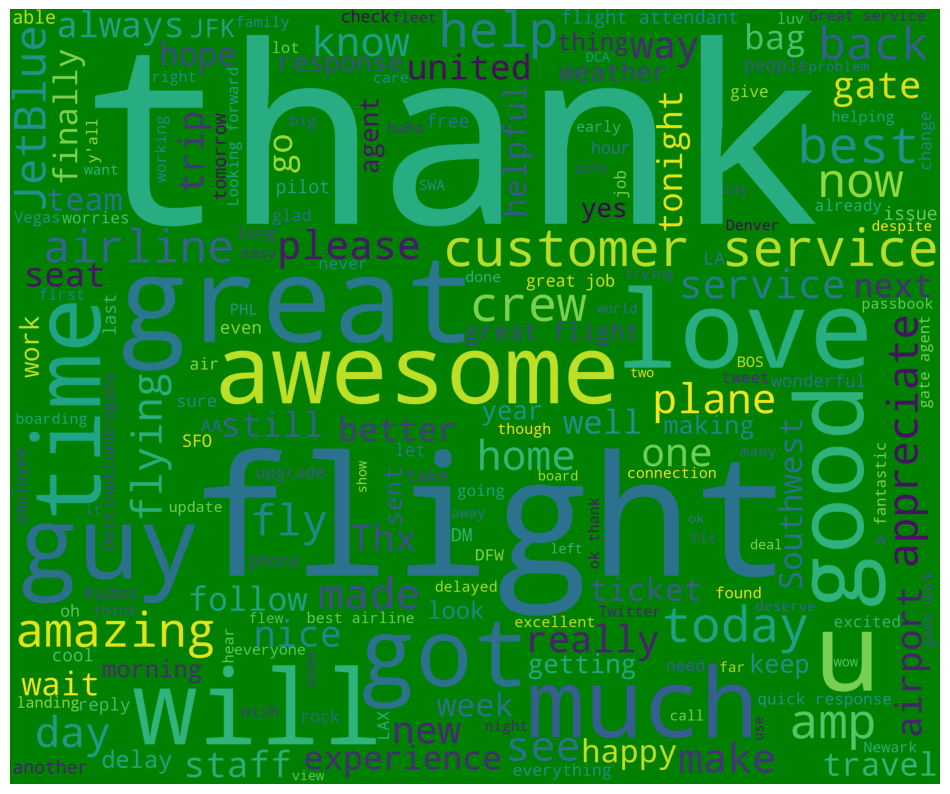

In [33]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='green',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Part 3: Text Preprocessing and Cleaning

### Method 1 (TFI-DF+SMOTE)

#### Install package to deal with imbalanced dataset

In [34]:
!pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import libraries text Ppreprocessing & cleaning purpose

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Create function to convert  3 types of sentiment into 0,1,2

Convert sentiment into number:<br>
1:positive<br>
0:neutral<br>
-1:negative

In [36]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 1
    elif sentiment == "neutral":
        return 0
    elif sentiment == "negative":
        return -1

#### Apply convert_Sentiment function

In [38]:
a= df.airline_sentiment = df.airline_sentiment
print(a)
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))


0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object


#### Print airline_sentiment columns after conversion

In [38]:
df.airline_sentiment

0        0
1        1
2        0
3       -1
4       -1
        ..
14635    1
14636   -1
14637    0
14638   -1
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

#### Text Cleaning

Removing unnecessary words is one of the important steps before conducting with machine learning such as stopword, url and punctuation.

In [39]:
#remove stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punctuation
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

#### Print final results of text cleaning

In [40]:
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

#### Assign final_text and airline_sentiment to X and Y

In [41]:
X = df['final_text']
Y = df['airline_sentiment']

#### Split the data into train and test

In [42]:
# 70,30
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3)

#### Vectorization

Vectorization is a process in which text data is converted into numerical vectors that can be used as input to a machine learning algorithm.

**TF-IDF** is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval and text mining. The acronym stands for "Term Frequency-Inverse Document Frequency". The term frequency is a measure of how often a term appears in a document, while the inverse document frequency is a measure of how rare a term is across all documents in the corpus. It is used to quantify the importance or relevance of string representations (words, phrases, lemmas, etc).<br><br>

#### Apply TFI-DF on cleaned tweets

In [43]:
tfid = TfidfVectorizer(use_idf=True)
X_train_vect =  tfid.fit_transform(X_train)

#the first column shows where and what is the unique word located in the dataframe.
#just fit X_final to our ML algorithm, and it would become sample and features for row and column respectively.
print(X_train_vect)

  (0, 5448)	0.2584178162990389
  (0, 4929)	0.33025022087760414
  (0, 5995)	0.32662761754965564
  (0, 8483)	0.23812013964313014
  (0, 3100)	0.2196592916305109
  (0, 8591)	0.30364055375553817
  (0, 4610)	0.21189279249482032
  (0, 2947)	0.3783399706350915
  (0, 1629)	0.41651095242837477
  (0, 820)	0.32662761754965564
  (0, 7992)	0.16074233076426178
  (0, 1127)	0.1620977244294809
  (1, 7930)	0.281384613361266
  (1, 8156)	0.35580494818647895
  (1, 2747)	0.3573581023048645
  (1, 2097)	0.3093921158259383
  (1, 3440)	0.22194993353764877
  (1, 6917)	0.2972153415611163
  (1, 5921)	0.26256534133518783
  (1, 3062)	0.23273343160382892
  (1, 1424)	0.3803711650188387
  (1, 3054)	0.2616072190076178
  (1, 1169)	0.31140414650973897
  (2, 2017)	0.7463775974060198
  (2, 9102)	0.6655227134293896
  :	:
  (10245, 519)	0.32042938236474877
  (10245, 4158)	0.3112033843127296
  (10245, 4015)	0.291770814819573
  (10245, 6358)	0.26962950633744914
  (10245, 6333)	0.22882521694040805
  (10245, 8086)	0.22958387259777

#### Handling imbalanced

**SMOTE (Synthetic Minority Oversampling Technique)** is an oversampling method for dealing with imbalanced datasets. It works by generating synthetic samples of the minority class (i.e. the class that has fewer samples) in order to balance the dataset. 

In [44]:
smote = SMOTE()
X_sm,Y_sm = smote.fit_resample(X_train_vect,Y_train)

# Part 4: Machine Learning

Machine learning is well-suited to sentiment analysis because it allows a computer to learn to identify the sentiment of a given piece of text without being explicitly programmed to do so. This is important because the nuances of language and the many ways that people can express their emotions make it difficult to design a set of rules for determining sentiment. <br><br>
By training a machine learning model on a large dataset of labeled text, the model can learn to identify the features of text that are most indicative of a particular sentiment and use this knowledge to make predictions about the sentiment of new, unseen text. This can save a lot of time and effort compared to manually designing a set of rules to determine sentiment.

# Random Forest Method

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=30,max_features="sqrt",random_state=None)

#n_estimators value was measured in next few sections
#selected based on accuracy score and lesser training time

rf_model.fit(X_sm,Y_sm)
X_test_vect =  tfid.transform(X_test)
Y_pred_rf = rf_model.predict(X_test_vect)
print('done')

done


In [46]:
rf_model.fit(X_sm,Y_sm)
X_test_vect =  tfid.transform(X_test)

#### Classification Report

In [47]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
cr_rf = classification_report(Y_test,Y_pred_rf)
print(cr_rf)



              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      2753
           0       0.80      0.80      0.80       904
           1       0.80      0.71      0.76       735

    accuracy                           0.91      4392
   macro avg       0.86      0.84      0.85      4392
weighted avg       0.90      0.91      0.91      4392



#### Plot confusion matrix

[[2742    5    6]
 [  63  719  122]
 [  38  172  525]]


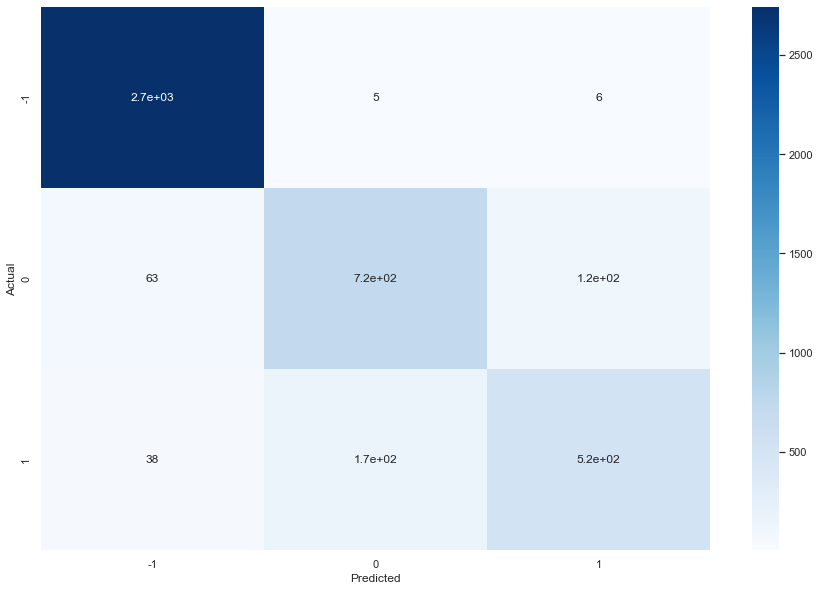

In [48]:
#matrix = plot_confusion_matrix(rf_model, X_test_vect, Y_test, cmap=plt.cm.Greens)
#matrix.ax_.set_title('Confusion Matrix', color='black')
#plt.xlabel('Predicted label', color = 'black')
#plt.ylabel('True label', color = 'black')
#plt.gcf().axes[0].tick_params(colors='black')
#plt.gcf().axes[1].tick_params(colors='black')
#plt.gcf().set_size_inches(10,6)
#plt.show()
cm = confusion_matrix(Y_test,Y_pred_rf, labels=rf_model.classes_)
print(cm)
sns.heatmap(cm,cmap="Blues",annot=True,
           xticklabels = [-1,0,1], yticklabels = [-1,0,1]
           )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
print("Accuracy for RF:", accuracy_score(Y_test,Y_pred_rf), "\n")

Accuracy for RF: 0.9075591985428051 



# Optimization of RF

In [50]:
i=10
x_rf=[]
y_rf=[]
while i <= 100:
#     print(f"train {i}")
    rf_model = RandomForestClassifier(n_estimators=i,max_features="sqrt",random_state=None)
    rf_model.fit(X_sm,Y_sm)
    Y_pred_rf = rf_model.predict(X_test_vect)
    Accuracy_rf = accuracy_score(Y_test,Y_pred_rf)
    x_rf.append(i)
    y_rf.append(Accuracy_rf)
    print(i , " : " , Accuracy_rf)
    i+=5

10  :  0.8995901639344263
15  :  0.9000455373406193
20  :  0.907103825136612
25  :  0.9089253187613844
30  :  0.9093806921675774
35  :  0.9105191256830601
40  :  0.9116575591985429
45  :  0.9139344262295082
50  :  0.9114298724954463
55  :  0.9105191256830601
60  :  0.9137067395264117
65  :  0.9141621129326047
70  :  0.9098360655737705
75  :  0.9134790528233151
80  :  0.9123406193078324
85  :  0.9109744990892532
90  :  0.9118852459016393
95  :  0.9114298724954463
100  :  0.9132513661202186


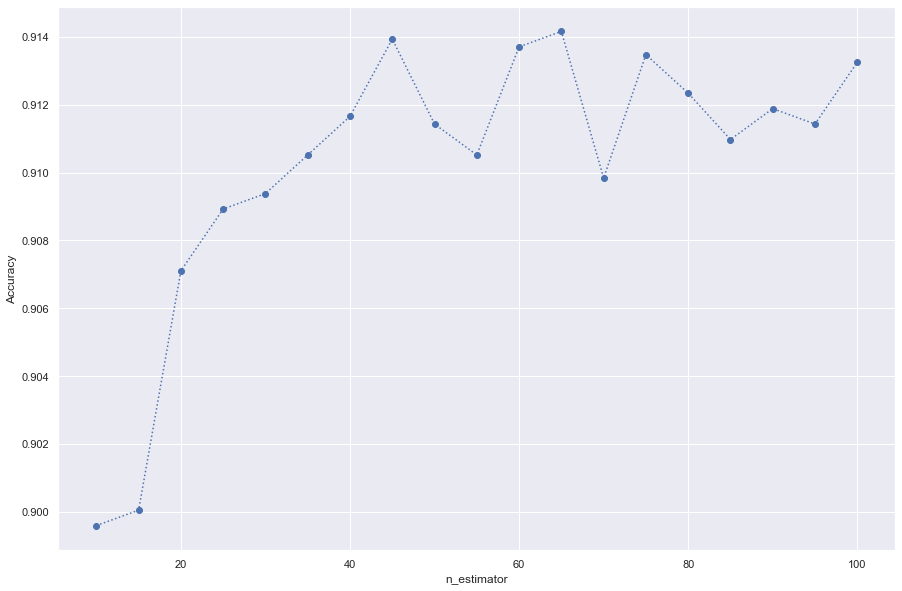

In [51]:
x_rf=np.array(x_rf)
y_rf=np.array(y_rf)
plt.plot(x_rf, y_rf, 'o',linestyle = 'dotted')
plt.xlabel("n_estimator")
plt.ylabel("Accuracy")
plt.show()

In [52]:
max_y_rf = max(y_rf)
max_x_rf = x_rf[y_rf.argmax()]
print(max_x_rf)

65


# SVM Method

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid_SVM = {'C': [10, 100, 1000], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear']}

In [55]:
grid_SVM = GridSearchCV(SVC(), param_grid_SVM, refit = True, verbose = 3)

In [56]:
grid_SVM.fit(X_train_vect, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.916 total time=  15.1s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.919 total time=  14.4s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.920 total time=  13.5s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.915 total time=  19.4s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.913 total time=  15.2s
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.893 total time=   7.5s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.904 total time=   6.8s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.913 total time=   7.3s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.890 total time=   7.3s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.893 total time=   7.4s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.913 total time=   8.3s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [57]:
# print best parameter after tuning
print(grid_SVM.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_SVM.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [58]:
#Fitting according to the best params
svm_clf2 = SVC(kernel = 'rbf', C = 10, gamma = 0.1)
svm_clf2.fit(X_train_vect, Y_train)

SVC(C=10, gamma=0.1)

In [59]:
from sklearn.metrics import accuracy_score
predict_SVM = svm_clf2.predict(X_test_vect)

#### Accuracy of SVM based on best parameters

In [60]:
predict_SVM_accuracy = round(accuracy_score(predict_SVM,Y_test) *100)
print('Accuracy for SVM is ', predict_SVM_accuracy,'%')

Accuracy for SVM is  92 %


#### Classification Report

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
report_svm = classification_report(Y_test,predict_SVM)
print(report_svm)

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      2753
           0       0.82      0.83      0.83       904
           1       0.83      0.75      0.79       735

    accuracy                           0.92      4392
   macro avg       0.88      0.86      0.87      4392
weighted avg       0.92      0.92      0.92      4392



#### Plot confusion matrix

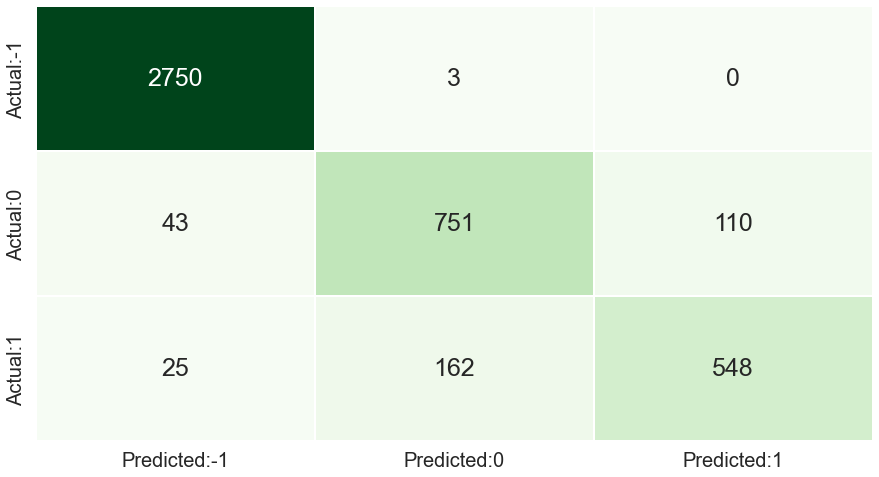

In [62]:
cm_svm = confusion_matrix(Y_test, predict_SVM)
cm_svm
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix_svm = pd.DataFrame(data = cm_svm,columns = ['Predicted:-1','Predicted:0','Predicted:1'], index = ['Actual:-1','Actual:0','Actual:1'])
#plotting the confusion matrix
sns.heatmap(conf_matrix_svm, annot = True, fmt = 'd', cmap = 'Greens', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Logistic Regression Method

[[2751    2    0]
 [  74  755   75]
 [  42  192  501]]


Accuracy for LR (before optimize) is  0.9123406193078324 

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      2753
           0       0.80      0.84      0.81       904
           1       0.87      0.68      0.76       735

    accuracy                           0.91      4392
   macro avg       0.87      0.84      0.85      4392
weighted avg       0.91      0.91      0.91      4392



Text(111.5, 0.5, 'Actual')

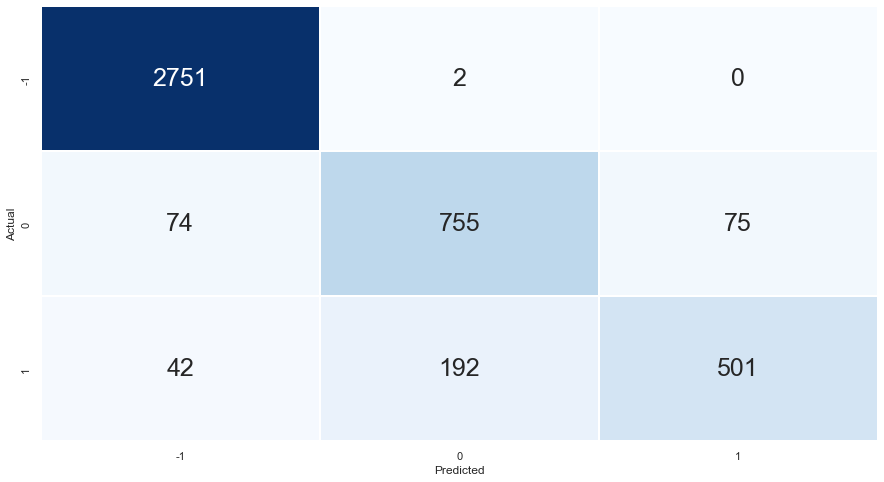

In [63]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
Y_pred_LR = LR.fit(X_train_vect, Y_train).predict(X_test_vect)
print(confusion_matrix(Y_test, Y_pred_LR))
print('\n')
print('Accuracy for LR (before optimize) is ', accuracy_score(Y_test,Y_pred_LR),"\n")
print(classification_report(Y_test, Y_pred_LR))

sns.heatmap(confusion_matrix(Y_test, Y_pred_LR), cmap = 'Blues', annot = True, fmt = 'd', cbar = False,linewidths = 0.1, annot_kws = {'size':25}, xticklabels = [-1,0,1], yticklabels = [-1,0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [64]:
solvers_LR = ['newton-cg','sag', 'saga','lbfgs']
c_LR = [100, 10, 1.0, 0.1, 0.01]
penalty_LR = ['l1', 'l2']

In [65]:
#for optimization process, the main hyperparameter tuned were solver, penalty, and C
# solver  : ‘newton-cg’,‘sag’, ‘saga’,‘lbfgs’ ------------->default : Lbfgs
#    C    : 100, 10, 1.0, 0.1, 0.01 ----------------------->default : 1.0
# penalty : Decide later #l1 : Lasso(absolute magnitude) #L2 : Ridge(squared magnitude) --->default: L2
from sklearn.model_selection import GridSearchCV
param_LR = dict(solver=solvers_LR,C=c_LR, penalty = penalty_LR )
grid_LR = GridSearchCV(estimator=LR, param_grid=param_LR, n_jobs=-1, verbose=3, scoring='accuracy',error_score=0)
# fitting the model for grid search 
grid_LR.fit(X_train_vect, Y_train)
# print best parameter after tuning 
print("Best parameters measured :",grid_LR.best_params_ , "\n")
grid_y_pred_LR = grid_LR.predict(X_test_vect)
# print classification report for the best param
print("The optimized LR model : \n",classification_report(Y_test, grid_y_pred_LR)) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters measured : {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'} 

The optimized LR model : 
               precision    recall  f1-score   support

          -1       0.97      1.00      0.99      2753
           0       0.78      0.86      0.82       904
           1       0.85      0.67      0.75       735

    accuracy                           0.91      4392
   macro avg       0.87      0.84      0.85      4392
weighted avg       0.91      0.91      0.91      4392



#### Print LR accuracy

In [66]:
print('Accuracy for LR (after optimize) is ', accuracy_score(Y_test, grid_y_pred_LR))

Accuracy for LR (after optimize) is  0.9143897996357013


#### Plot confusion matrix

[[2751    2    0]
 [  74  755   75]
 [  42  192  501]]


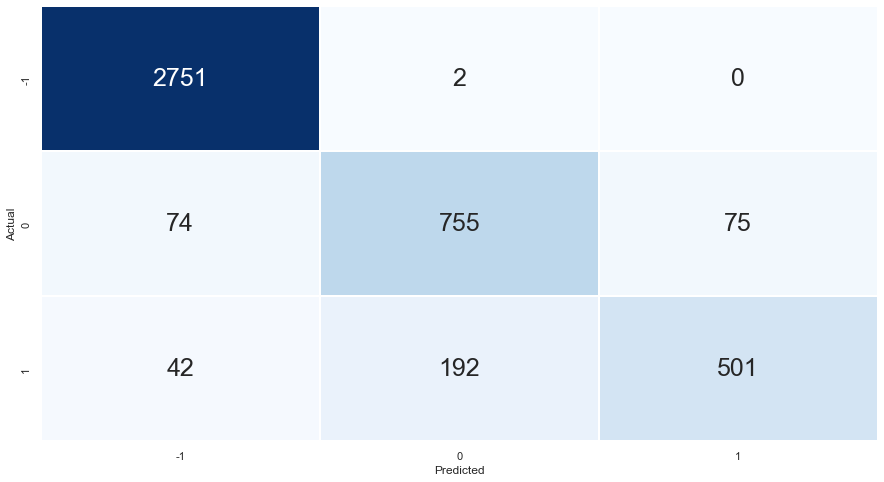

In [67]:
print(confusion_matrix(Y_test, Y_pred_LR))
sns.heatmap(confusion_matrix(Y_test, Y_pred_LR), cmap = 'Blues', annot = True, fmt = 'd', cbar = False,linewidths = 0.1, annot_kws = {'size':25},xticklabels = [-1,0,1], yticklabels = [-1,0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Print best parameters

In [68]:
print("Best parameters measured :",grid_LR.best_params_ , "\n")

Best parameters measured : {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'} 



# Part 5: Comparison among the algorithm

In [69]:
print('Maximum accuracy for SVM is ', predict_SVM_accuracy,'%')
print('Maximum accuracy for LR is ', round(accuracy_score(Y_test, grid_y_pred_LR)*100),"%")
print('Maximum accuracy for RF is ', round(Accuracy_rf*100),"%")

Maximum accuracy for SVM is  92 %
Maximum accuracy for LR is  91 %
Maximum accuracy for RF is  91 %


# Part 6: Conclusion

In this study, we have completed Sentiment Analysis on Twitter US Airlines. The purpose of this study is to know what are the opinions of customers towards US airlines based on twitter data. It might be difficult to determine the primary difficulties facing airline firms based on favourable and unfavourable tweets since there are a lot of opinions and comments towards airlines. Sentiment analysis can help quickly and accurately process large amounts of text data, saving time and resources that would otherwise be spent manually reviewing and analyzing the data.<br><br>
The problem statement and objectives have been defined and briefly explained in the section above. The dataset used is a ready dataset that obtained from (Source: Kaggle | Twitter US Airline Sentiment). First of all, the data pre-processing , EDA and text pre-processing using TFI-DF and SMOTE have been conducted to make the data more meaningful to be used in the next phases. After completing with data processing part, machine learning took place to train and test the dataset using Sentiment Analysis method. The detailed processes can be referred to the section above. There are three Machine Learning algorithms are selected including Random Forest, Support Vector Machine and Logistic Regression.<br><br>
In a nutshell, opinions of customers are really significant for airlines to know their services. Sentiment analysis is suitable to identify the opinions of the passengers towards airline. At the end of the study, the objectives of the study have been achieved and the problem statement have been answered by the works that have been done in this study. Besides that, we summarized our results and findings in the slide with comparing on the algorithms. SVM shows the best performance in this study. By using sentiment analysis to identify customer sentiment towards airlines, airlines companies can quickly identify and address customer complaints or concerns. This can lead to improved customer satisfaction and loyalty. The insights gained from this study may help airlines to enhance services. Lastly, the work distribution is attached at the next page. Everyone is committed to the project and showing high cooperation.